# AUTOSCOUT CAPSTONE PROJECT(The third part)

In [533]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
#from skimpy import clean_columns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('display.max_columns', None)
sns.set_theme(font_scale=1.2, style="darkgrid")

In [534]:
df_origin = pd.read_csv("AutoScout_Zero", index_col=[0])
df = df_origin.copy()
df.head().T

,0,1,2,3,4
Model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
Body_Type,Sedans,Sedans,Sedans,Sedans,Sedans
Price,15770.0,14500.0,14640.0,14500.0,16790.0
Vat,VAT deductible,Price negotiable,VAT deductible,No_Discount,No_Discount
Km,56013.0,80000.0,83450.0,73000.0,16200.0
Registration_Date,2016-01-01,2017-03-01,2016-02-01,2016-08-01,2016-05-01
Prev_Owner,2.0,1.0,1.0,1.0,1.0
Type,Used,Used,Used,Used,Used
Body_Color,Black,Red,Black,Brown,Black
Paint_Type,Metallic,Metallic,Metallic,Metallic,Metallic


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14433 entries, 0 to 15918
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 14433 non-null  object 
 1   Body_Type             14433 non-null  object 
 2   Price                 14433 non-null  float64
 3   Vat                   14433 non-null  object 
 4   Km                    14433 non-null  float64
 5   Registration_Date     14433 non-null  object 
 6   Prev_Owner            14433 non-null  float64
 7   Type                  14433 non-null  object 
 8   Body_Color            14433 non-null  object 
 9   Paint_Type            14433 non-null  object 
 10  Door_Total            14433 non-null  float64
 11  Seat_Total            14433 non-null  float64
 12  Gear_Type             14433 non-null  object 
 13  Cylinders             14433 non-null  float64
 14  Weight                14433 non-null  float64
 15  Drive_Chain        

In [536]:
df["Registration_Date"] = pd.to_datetime(df["Registration_Date"])

In [537]:
def first_look(col):
    print('column name : ', col)
    print("--"*20)
    print('Per_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Number of Nulls  : ', df[col].isnull().sum())
    print('Number of Uniques: ', df[col].nunique())
    print('Type of columns: ', df[col].dtype)
    print("--"*20)
    print('Unique values of columns: ', df[col].unique())
    print("--"*20)
    print(df[col].value_counts(dropna = False).sort_index())
    print("--"*20)
    print(df[col].value_counts(dropna = False))
    print("##"*40)
    print()

In [538]:
for i in df.columns:
    first_look(i)

column name :  Model
----------------------------------------
Per_of_Nulls   :  % 0.0
Number of Nulls  :  0
Number of Uniques:  9
Type of columns:  object
----------------------------------------
Unique values of columns:  ['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
----------------------------------------
Audi A1           2397
Audi A2              1
Audi A3           2813
Opel Astra        2327
Opel Corsa        2055
Opel Insignia     2414
Renault Clio      1506
Renault Duster      34
Renault Espace     886
Name: Model, dtype: int64
----------------------------------------
Audi A3           2813
Opel Insignia     2414
Audi A1           2397
Opel Astra        2327
Opel Corsa        2055
Renault Clio      1506
Renault Espace     886
Renault Duster      34
Audi A2              1
Name: Model, dtype: int64
################################################################################

column name :  Body_Typ

Name: Type, dtype: int64
################################################################################

column name :  Body_Color
----------------------------------------
Per_of_Nulls   :  % 0.0
Number of Nulls  :  0
Number of Uniques:  16
Type of columns:  object
----------------------------------------
Unique values of columns:  ['Black' 'Red' 'Brown' 'White' 'Grey' 'Silver' 'Blue' 'Beige' 'Violet'
 'Yellow' 'Green' 'Black ' 'Bronze' 'Orange' 'Gold' 'Blue ']
----------------------------------------
Beige       98
Black     3642
Black        6
Blue      1330
Blue         4
Bronze       6
Brown      265
Gold         2
Green      149
Grey      3438
Orange       3
Red        843
Silver    1536
Violet      18
White     3045
Yellow      48
Name: Body_Color, dtype: int64
----------------------------------------
Black     3642
Grey      3438
White     3045
Silver    1536
Blue      1330
Red        843
Brown      265
Green      149
Beige       98
Yellow      48
Violet      18
Black        6

Unique values of columns:  ['Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system'
 'Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,Start-stop system,Tinted windows'
 'Air conditioning,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Seat heating,Start-stop system'
 ...
 'Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrically heated windshield,Electrical side mirrors,Electric tailgate,Heads-up display,Heated steering whe

Type of columns:  object
----------------------------------------
Unique values of columns:  ['Bluetooth,Hands-free equipment,On-board computer,Radio'
 'Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system'
 'MP3,On-board computer'
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB'
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB'
 'Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system,USB'
 'Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,Sound system,USB'
 'CD player,MP3,Radio' 'Radio' 'NoInformation'
 'CD player,Hands-free equipment,On-board computer,Radio,USB'
 'Bluetooth,On-board computer,Radio'
 'Bluetooth,CD player,Hands-free equipment,On-board computer,Radio'
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio'
 'Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,USB'
 'Radio,Sound system'
 'Bluetooth,CD player,MP3,On-b

Name: Hp, Length: 92, dtype: int64
################################################################################

column name :  Particulate_Filter
----------------------------------------
Per_of_Nulls   :  % 0.0
Number of Nulls  :  0
Number of Uniques:  2
Type of columns:  int64
----------------------------------------
Unique values of columns:  [1 0]
----------------------------------------
0    10106
1     4327
Name: Particulate_Filter, dtype: int64
----------------------------------------
0    10106
1     4327
Name: Particulate_Filter, dtype: int64
################################################################################

column name :  Inspection_Situation
----------------------------------------
Per_of_Nulls   :  % 0.0
Number of Nulls  :  0
Number of Uniques:  2
Type of columns:  int64
----------------------------------------
Unique values of columns:  [1 0]
----------------------------------------
0    10749
1     3684
Name: Inspection_Situation, dtype: int64
---------

----------------------------------------
Unique values of columns:  ['(60, 70]' '(120, 350]' '(80, 90]' '(90, 100]' '(100, 120]' '(50, 60]'
 '(70, 80]' '(0, 50]']
----------------------------------------
(0, 50]         25
(100, 120]    1832
(120, 350]    1831
(50, 60]      1740
(60, 70]      2867
(70, 80]       472
(80, 90]      3961
(90, 100]     1705
Name: Hp_Interval, dtype: int64
----------------------------------------
(80, 90]      3961
(60, 70]      2867
(100, 120]    1832
(120, 350]    1831
(50, 60]      1740
(90, 100]     1705
(70, 80]       472
(0, 50]         25
Name: Hp_Interval, dtype: int64
################################################################################

column name :  Emission_Interval
----------------------------------------
Per_of_Nulls   :  % 0.0
Number of Nulls  :  0
Number of Uniques:  6
Type of columns:  object
----------------------------------------
Unique values of columns:  ['(-1, 100]' '(120, 140]' '(100, 120]' '(200, 1000]' '(140, 160]'
 '(1

# Target Feature - Price

In [539]:
df["Price"].describe()

count    14433.000000
mean     18121.672279
std       7425.909096
min         13.000000
25%      12950.000000
50%      16950.000000
75%      21900.000000
max      74600.000000
Name: Price, dtype: float64

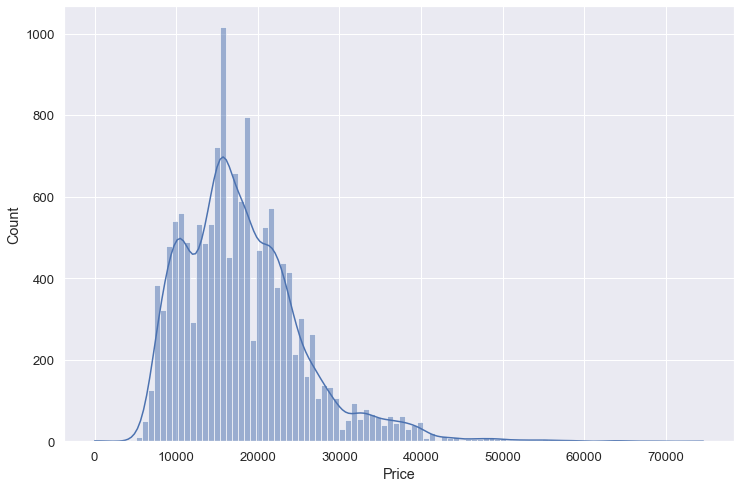

In [540]:
sns.histplot(df["Price"], kde=True);

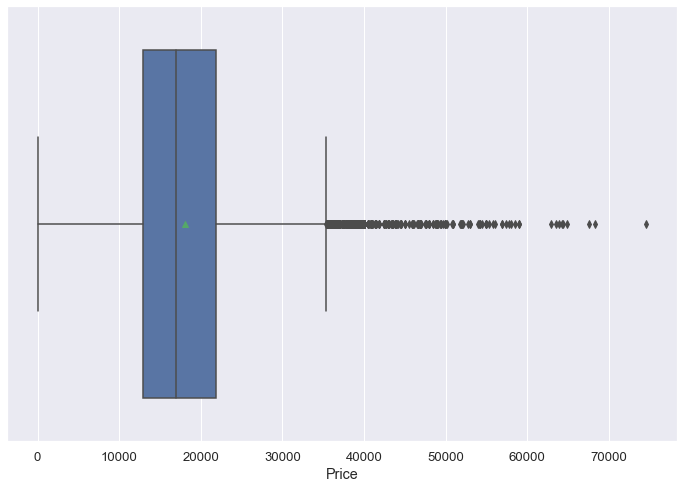

In [541]:
sns.boxplot(data=df, 
            x="Price",
            showmeans=True);

In [542]:
price_min_index = df[df["Price"] < 1000].index
df[df["Price"] < 1000]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
6066,Opel Astra,Station wagon,255.0,No_Discount,5563.0,2018-06-01,1.0,Used,Gold,Metallic,5.0,5.0,Manual,4.0,1403.0,front,Diesel,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.0,3.800000,100.0,1,0,101.000000,Cloth,Black,1.6,1.0,"(0, 10000]","(5000, 15000]","(1400, 1600]","(90, 100]","(100, 120]"
8594,Opel Corsa,Sedans,13.0,No_Discount,123.0,2018-06-01,0.0,Used,Gold,Metallic,3.0,5.0,Manual,4.0,1141.0,front,Benzine,Euro 6d,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.0,5.600000,66.0,0,0,128.000000,Cloth,Black,1.4,1.0,"(0, 10000]","(-1, 5000]","(1000, 1200]","(60, 70]","(120, 140]"
8828,Opel Corsa,Compact,120.0,No_Discount,12.0,2019-01-01,0.0,New,Grey,Metallic,5.0,5.0,Manual,3.0,1099.0,front,Benzine,Euro 6,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.0,4.600000,66.0,0,0,107.000000,Cloth,Black,1.0,0.0,"(0, 10000]","(-1, 5000]","(1000, 1200]","(60, 70]","(100, 120]"
8829,Opel Corsa,Other,331.0,No_Discount,10.0,2019-01-01,0.0,New,White,Metallic,5.0,5.0,Manual,3.0,1163.0,front,Benzine,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.0,5.585566,66.0,0,0,131.427287,Cloth,Black,1.0,0.0,"(0, 10000]","(-1, 5000]","(1000, 1200]","(60, 70]","(120, 140]"


In [543]:
df.loc[price_min_index,"Price"] = df.groupby(["Model","Km_Interval","Hp_Interval","Age","Body_Type"])["Price"].transform(lambda x : x.mean())[price_min_index].values
df.loc[price_min_index,"Price"]

6066    16049.000000
8594    12895.535714
8828    15532.125899
8829    11395.500000
Name: Price, dtype: float64

In [544]:
df[df["Price"] > 40000][["Model","Age"]].value_counts()

Model           Age
Renault Espace  0.0    103
Opel Insignia   0.0     26
Audi A3         1.0     14
                2.0      4
                0.0      3
                3.0      2
dtype: int64

In [545]:
df[df["Price"] > 60000]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
3587,Audi A3,Sedans,64900.0,No_Discount,35000.0,2018-04-01,1.0,Used,Grey,Metallic,5.0,5.0,Semi-automatic,5.0,1585.000000,front,Benzine,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0,8.300000,294.0,0,0,189.000000,Cloth,Black,2.5,1.0,"(30000, 80000]","(30000, 60000]","(1400, 1600]","(120, 350]","(160, 200]"
3590,Audi A3,Sedans,62900.0,No_Discount,700.0,2019-03-01,1.0,Used,Grey,Metallic,5.0,5.0,Semi-automatic,5.0,1585.000000,front,Benzine,Euro 6d,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",7.0,8.300000,294.0,0,0,194.000000,Cloth,Black,2.5,0.0,"(30000, 80000]","(-1, 5000]","(1400, 1600]","(120, 350]","(160, 200]"
3595,Audi A3,Station wagon,63900.0,VAT deductible,10.0,2019-06-01,1.0,Used,Black,Metallic,5.0,5.0,Semi-automatic,5.0,1585.000000,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Ski bag,Sport packa...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,8.300000,294.0,0,0,189.000000,Part leather,Black,2.5,0.0,"(30000, 80000]","(-1, 5000]","(1400, 1600]","(120, 350]","(160, 200]"
3648,Audi A3,Sedans,74600.0,VAT deductible,13000.0,2018-05-01,1.0,Used,Black,Metallic,4.0,5.0,Semi-automatic,5.0,1490.000000,4WD,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Sport seats,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",7.0,8.300000,294.0,0,0,188.000000,Full leather,Grey,2.5,1.0,"(30000, 80000]","(5000, 15000]","(1400, 1600]","(120, 350]","(160, 200]"
3649,Audi A3,Compact,67600.0,VAT deductible,37747.0,2017-10-01,1.0,Used,White,Metallic,5.0,5.0,Semi-automatic,5.0,1485.000000,4WD,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Sport suspe...","ABS,Alarm system,Central door lock,Driver-side...",7.0,8.300000,294.0,0,0,189.000000,Full leather,Black,2.5,2.0,"(30000, 80000]","(30000, 60000]","(1400, 1600]","(120, 350]","(160, 200]"
15826,Renault Espace,Van,68320.0,VAT deductible,4307.0,2019-01-01,1.0,Demonstration,Black,Metallic,5.0,4.0,Automatic,4.0,1746.766423,front,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,6.500000,118.0,1,0,120.000000,Full leather,Brown,1.6,0.0,"(30000, 80000]","(-1, 5000]","(1600, 1800]","(100, 120]","(100, 120]"
15828,Renault Espace,Van,64332.0,VAT deductible,1.0,2019-01-01,0.0,New,Grey,Metallic,5.0,7.0,Automatic,4.0,1647.000000,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Alarm system,Blind spot monitor,Daytime ru...",7.0,7.600000,165.0,0,0,156.295337,Full leather,Brown,1.8,0.0,"(30000, 80000]","(-1, 5000]","(1600, 1800]","(120, 350]","(140, 160]"
15831,Renault Espace,Van,64298.0,VAT deductible,15.0,2019-01-01,0.0,New,White,Metallic,5.0,7.0,Automatic,4.0,1647.000000,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Alarm system,Blind spot monitor,Daytime ru...",6.0,7.600000,165.0,0,0,156.295337,Full leather,Grey,1.8,0.0,"(30000, 80000]","(-1, 5000]","(1600, 1800]","(120, 350]","(140, 1

# Numerical Features

In [546]:
df.select_dtypes(exclude="O").describe().T

,count,mean,std,min,25%,50%,75%,max
Price,14433.0,18125.493602,7420.288059,4950.0,12950.0,16950.000000,21900.0,74600.0
Km,14433.0,31922.466859,36849.589485,0.0,3000.0,20455.000000,46000.0,317000.0
Prev_Owner,14433.0,0.842860,0.479167,0.0,1.0,1.000000,1.0,4.0
Door_Total,14433.0,4.659045,0.641504,1.0,4.0,5.000000,5.0,7.0
Seat_Total,14433.0,4.950461,0.461486,2.0,5.0,5.000000,5.0,7.0
Cylinders,14433.0,3.806624,0.404664,1.0,4.0,4.000000,4.0,8.0
Weight,14433.0,1357.155057,207.049573,1.0,1180.0,1320.530435,1475.0,2471.0
Gears,14433.0,5.854777,0.781384,1.0,5.0,6.000000,6.0,50.0
Consumption,14433.0,4.892429,1.602418,0.0,4.1,4.800000,5.4,55.0
Hp,14433.0,88.502857,26.683781,1.0,66.0,85.000000,103.0,294.0


In [547]:
df.select_dtypes(exclude="O").corr()

,Price,Km,Prev_Owner,Door_Total,Seat_Total,Cylinders,Weight,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Engine_Size,Age
Price,1.000000,-0.399832,-0.290033,0.155939,0.238830,-0.036487,0.453472,0.483846,0.157576,0.694940,0.064733,0.002165,0.321899,0.278306,-0.474104
Km,-0.399832,1.000000,0.394502,-0.009399,-0.011892,0.201106,0.181999,-0.011188,-0.197733,0.011623,0.256271,-0.032023,-0.193613,0.310821,0.753253
Prev_Owner,-0.290033,0.394502,1.000000,-0.108039,-0.053067,0.100923,0.048722,-0.048554,-0.123893,-0.032927,0.076675,0.067294,-0.130965,0.132772,0.585553
Door_Total,0.155939,-0.009399,-0.108039,1.000000,0.111226,0.055625,0.138654,0.141600,-0.017455,0.120851,0.028834,-0.119633,-0.031425,0.086287,-0.092271
Seat_Total,0.238830,-0.011892,-0.053067,0.111226,1.000000,0.252580,0.309758,0.123587,0.122866,0.282365,0.041407,-0.007403,0.246672,0.195633,-0.085715
Cylinders,-0.036487,0.201106,0.100923,0.055625,0.252580,1.000000,0.298439,0.121989,0.095211,0.276767,0.147519,-0.048147,0.310997,0.624044,0.144191
Weight,0.453472,0.181999,0.048722,0.138654,0.309758,0.298439,1.000000,0.393009,0.042766,0.653788,0.287982,-0.023280,0.278629,0.627020,0.086910
Gears,0.483846,-0.011188,-0.048554,0.141600,0.123587,0.121989,0.393009,1.000000,0.010418,0.474756,0.182580,-0.030303,0.143748,0.367471,-0.066083
Consumption,0.157576,-0.197733,-0.123893,-0.017455,0.122866,0.095211,0.042766,0.010418,1.000000,0.202993,-0.189265,0.060636,0.516813,0.000593,-0.222182
Hp,0.694940,0.011623,-0.032927,0.120851,0.282365,0.276767,0.653788,0.474756,0.202993,1.000000,0.146782,0.048041,0.487144,0.603276,-0.087783


# Km

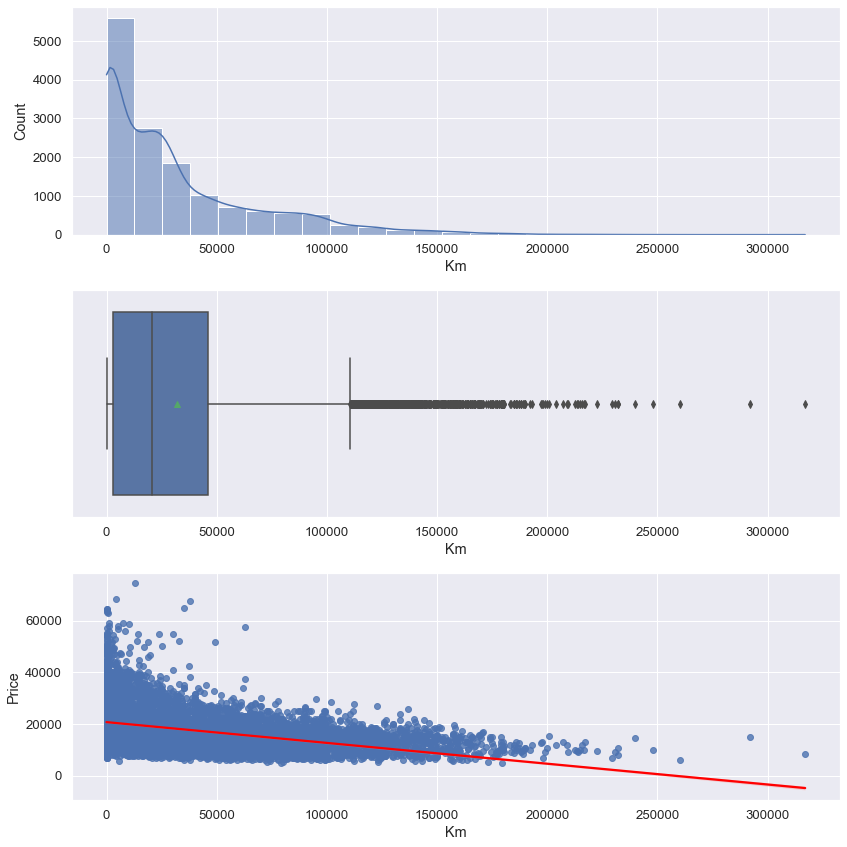

In [548]:
fig, ax = plt.subplots(3,1, figsize = (12,12))
sns.histplot(df["Km"], kde=True, bins=25,ax=ax[0]);
sns.boxplot(data=df, 
            x="Km",
            showmeans=True,
            ax=ax[1]);
sns.regplot(x="Km", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [549]:
df["Km"].describe()

count     14433.000000
mean      31922.466859
std       36849.589485
min           0.000000
25%        3000.000000
50%       20455.000000
75%       46000.000000
max      317000.000000
Name: Km, dtype: float64

In [550]:
df[df["Km"]>200000].sample(5)

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
3082,Audi A3,Compact,15445.0,VAT deductible,200814.0,2016-09-01,1.0,Used,Grey,Metallic,5.0,5.0,Manual,4.0,1250.000,front,Diesel,Euro 6,"Air conditioning,Armrest,Cruise control,Electr...","CD player,Radio","Alloy wheels,Sport seats,Sport suspension","Alarm system,Central door lock,Driver-side air...",6.0,3.8,82.0,0,0,104.0,Cloth,Black,1.6,3.0,"(15000, 20000]","(100000, 350000]","(1200, 1400]","(80, 90]","(100, 120]"
9279,Opel Corsa,Sedans,8350.0,No_Discount,317000.0,2017-11-01,1.0,Used,Red,Metallic,3.0,5.0,Manual,4.0,1199.000,front,Benzine,Euro 6d,"Air conditioning,Hill Holder,Power windows",On-board computer,NoInformation,"ABS,Central door lock with remote control,Dayt...",5.0,6.0,66.0,0,0,136.0,Cloth,Black,1.4,2.0,"(0, 10000]","(100000, 350000]","(1000, 1200]","(60, 70]","(120, 140]"
10848,Opel Insignia,Station wagon,9980.0,VAT deductible,216560.0,2016-05-01,1.0,Used,Silver,Metallic,5.0,5.0,Automatic,4.0,1743.000,front,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,On-board com...","Alloy wheels,Roof rack,Sport seats,Touch screen","ABS,Adaptive headlights,Central door lock,Driv...",6.0,5.5,125.0,1,0,145.0,Cloth,Black,2.0,3.0,"(0, 10000]","(100000, 350000]","(1600, 1800]","(120, 350]","(140, 160]"
6316,Opel Astra,Sedans,8950.0,VAT deductible,209467.0,2016-04-01,1.0,Used,Black,Metallic,4.0,5.0,Manual,4.0,1431.876,front,Diesel,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Hands-free equipment,On-board comput...","Alloy wheels,Trailer hitch","Central door lock,Daytime running lights,Drive...",6.0,3.9,100.0,1,1,103.0,Part leather,Black,1.6,3.0,"(0, 10000]","(100000, 350000]","(1400, 1600]","(90, 100]","(100, 120]"
6224,Opel Astra,Station wagon,9800.0,VAT deductible,248000.0,2016-01-01,1.0,Used,White,Metallic,4.0,4.0,Manual,4.0,1523.000,front,Diesel,Euro 5,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Touch screen,"ABS,Alarm system,Central door lock,Electronic ...",6.0,4.5,81.0,1,0,120.0,Cloth,Black,1.7,3.0,"(0, 10000]","(100000, 350000]","(1400, 1600]","(80, 90]","(100, 120]"


In [551]:
df["Km_Interval"] =pd.cut(df["Km"], bins=[-1,5000,15000,30000,60000,100000,350000])
df["Km_Interval"].value_counts()

(-1, 5000]          4111
(15000, 30000]      3330
(30000, 60000]      2330
(5000, 15000]       1971
(60000, 100000]     1818
(100000, 350000]     873
Name: Km_Interval, dtype: int64

# Prev_Owner

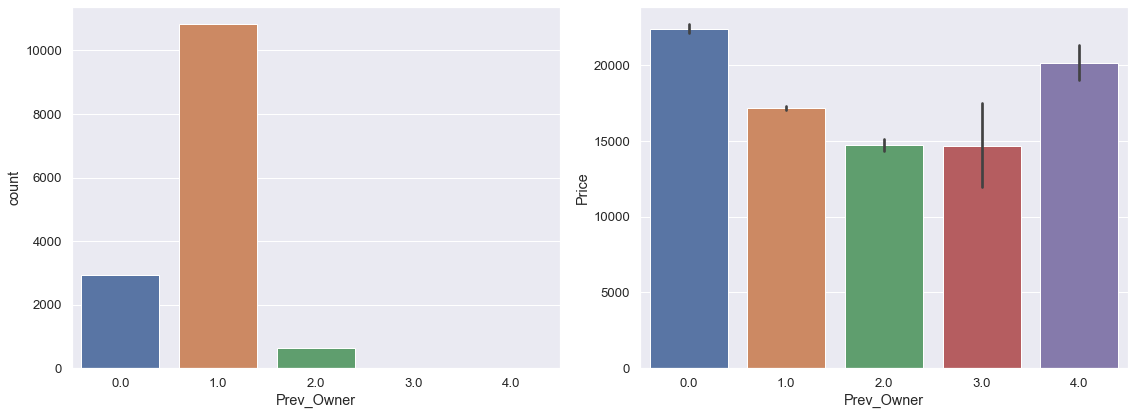

In [552]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.countplot(df["Prev_Owner"],ax=ax[0]);
sns.barplot(x="Prev_Owner", y="Price", data=df, ax=ax[1]);
plt.tight_layout()

In [553]:
df["Prev_Owner"].describe()

count    14433.000000
mean         0.842860
std          0.479167
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Prev_Owner, dtype: float64

# Door_Total

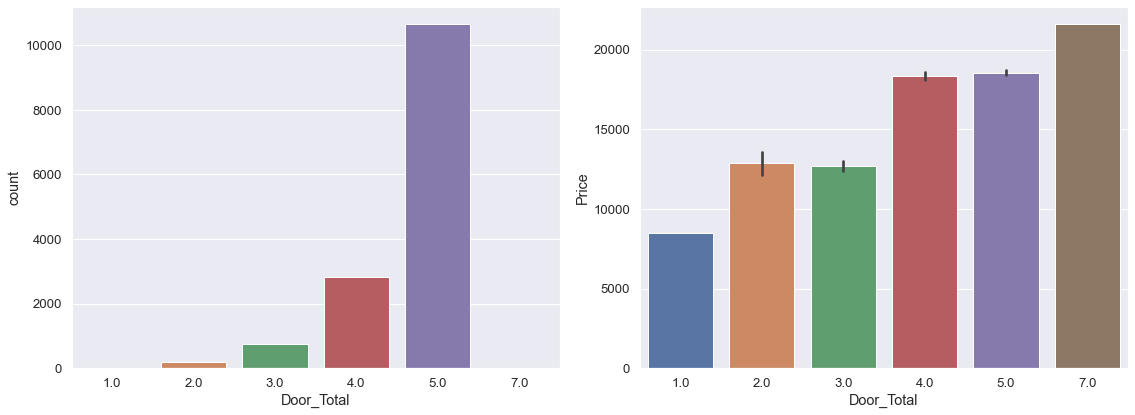

In [554]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.countplot(df["Door_Total"],ax=ax[0]);
sns.barplot(x="Door_Total", y="Price", data=df, ax=ax[1]);
plt.tight_layout()

In [555]:
df[df["Door_Total"] == 1]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
13782,Renault Clio,Compact,8500.0,VAT deductible,41493.0,2016-01-01,1.0,Used,White,Metallic,1.0,5.0,Manual,4.0,1169.759777,front,Diesel,Euro 6,NoInformation,NoInformation,NoInformation,NaN,5.0,3.585075,55.0,0,0,89.136842,Cloth,Black,1.5,3.0,"(0, 10000]","(30000, 60000]","(1000, 1200]","(50, 60]","(-1, 100]"


In [556]:
df.loc[df["Door_Total"] == 1,"Door_Total"] = 2

In [557]:
df[df["Door_Total"] == 7]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
15202,Renault Espace,Van,21600.0,Price negotiable,78000.0,2016-04-01,1.0,Used,Brown,Metallic,7.0,5.0,Automatic,4.0,1734.0,front,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,4.6,118.0,0,0,120.0,Full leather,Brown,1.6,3.0,"(20000, 25000]","(60000, 100000]","(1600, 1800]","(100, 120]","(100, 120]"


In [558]:
df.loc[df["Door_Total"] == 7,"Door_Total"] = df[df["Model"] == "Renault Espace"]["Door_Total"].mode()[0]

In [559]:
df[(df["Body_Type"] == "Sedans") & (df["Door_Total"] == 3)]["Model"].value_counts()

Opel Corsa    143
Audi A1       130
Audi A3        85
Opel Astra      3
Name: Model, dtype: int64

In [560]:
df[df["Door_Total"] == 3][["Body_Type"]].value_counts(dropna=False)

Body_Type    
Compact          366
Sedans           361
Coupe             17
Other              7
Transporter        4
Station wagon      2
dtype: int64

In [561]:
df.loc[(df["Body_Type"] == "Sedans") & (df["Door_Total"] == 3), "Door_Total"] = df[df["Body_Type"] == "Sedans"]["Door_Total"].mode()[0]

In [562]:
df["Door_Total"].value_counts(dropna=False)

5.0    11019
4.0     2823
3.0      396
2.0      195
Name: Door_Total, dtype: int64

In [563]:
df.corr()["Door_Total"]

Price                   0.119362
Km                     -0.005452
Prev_Owner             -0.079091
Door_Total              1.000000
Seat_Total              0.069533
Cylinders               0.035654
Weight                  0.092025
Gears                   0.123692
Consumption            -0.028742
Hp                      0.074477
Particulate_Filter      0.003659
Inspection_Situation   -0.134446
Emission               -0.056285
Engine_Size             0.062606
Age                    -0.047221
Name: Door_Total, dtype: float64

In [564]:
df.drop(columns="Door_Total", inplace=True)

# Seat_Total

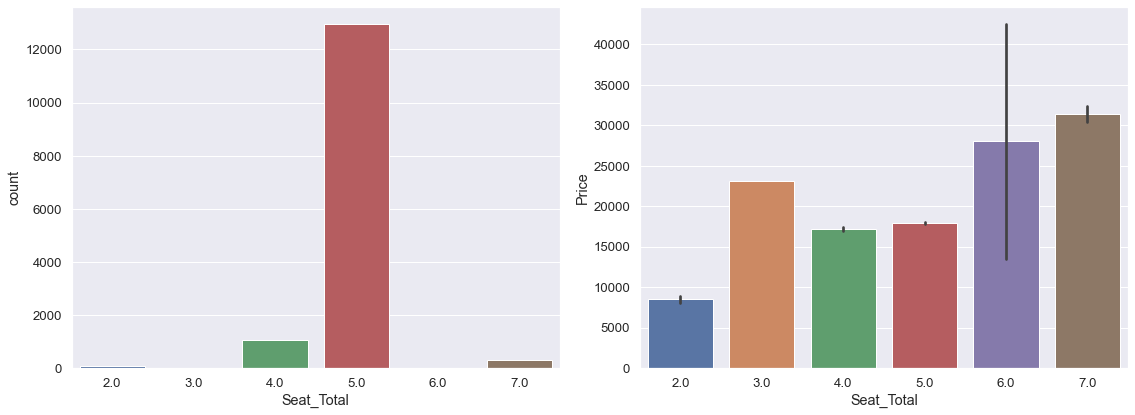

In [565]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.countplot(df["Seat_Total"],ax=ax[0]);
sns.barplot(x="Seat_Total", y="Price", data=df, ax=ax[1]);
plt.tight_layout()

In [566]:
df[df["Seat_Total"] == 3]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
1636,Audi A1,Compact,23090.0,No_Discount,9821.0,2018-06-01,1.0,Used,Black,Metallic,3.0,Automatic,4.0,1323.75,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",7.0,5.8,141.0,0,1,134.0,Part leather,Black,1.8,1.0,"(20000, 25000]","(5000, 15000]","(1200, 1400]","(120, 350]","(120, 140]"


In [567]:
df.loc[df["Seat_Total"] == 3, "Seat_Total"] = df[(df["Model"] == "Audi A1") & (df["Body_Type"] == "Compact")]["Seat_Total"].mode()[0]

In [568]:
df[df["Seat_Total"] == 6]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
582,Audi A1,Compact,13500.0,VAT deductible,100000.000000,2017-01-01,1.0,Used,White,Metallic,6.0,Manual,4.0,1500.0,front,Benzine,Euro 6,Air conditioning,On-board computer,Alloy wheels,ABS,5.0,4.746401,70.0,0,0,101.705531,Cloth,Black,1.0,2.0,"(10000, 15000]","(60000, 100000]","(1400, 1600]","(60, 70]","(100, 120]"
15890,Renault Espace,Station wagon,42490.0,VAT deductible,13.135135,2019-01-01,0.0,New,Black,Metallic,6.0,Automatic,4.0,1840.0,front,Diesel,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,5.700000,147.0,1,0,168.000000,Cloth,Other,2.0,0.0,"(30000, 80000]","(-1, 5000]","(1800, 3000]","(120, 350]","(160, 200]"


In [569]:
for indexes in df[df["Seat_Total"] == 6].index:
    df.loc[indexes, "Seat_Total"] = df[(df["Model"] == df["Model"][indexes]) & (df["Body_Type"] == df["Body_Type"][indexes])]["Seat_Total"].mode()[0]

In [570]:
df[df["Seat_Total"] == 7]["Model"].value_counts()

Renault Espace    311
Name: Model, dtype: int64

In [571]:
df[df["Seat_Total"] == 2][["Model","Body_Type"]].value_counts()

Model          Body_Type    
Renault Clio   Sedans           45
               Transporter      25
               Compact           5
Opel Corsa     Transporter       4
Renault Clio   Other             4
               Van               2
Opel Corsa     Coupe             1
Opel Insignia  Station wagon     1
dtype: int64

# Cylinders

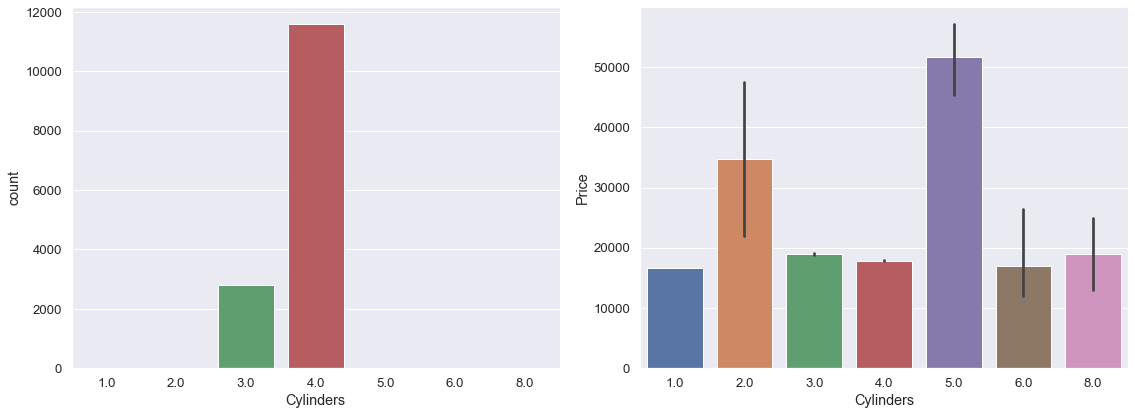

In [572]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.countplot(df["Cylinders"],ax=ax[0]);
sns.barplot(x="Cylinders", y="Price", data=df, ax=ax[1]);

plt.tight_layout()

In [ ]:
df[df["Cylinders"] < 3]

In [ ]:
df.groupby(["Model"])["Cylinders"].value_counts()

In [ ]:
df[df["Cylinders"].isin([6,8])]

In [ ]:
for indexes in df[df["Cylinders"].isin([1,2,8])].index:
    df.loc[indexes, "Cylinders"] = df[(df["Model"] == df["Model"][indexes]) & (df["Engine_Size"] == df["Engine_Size"][indexes])]["Cylinders"].mode()[0]

In [ ]:
for indexes in df[df["Cylinders"] == 8].index:
    df.loc[indexes, "Cylinders"] = df[(df["Model"] == df["Model"][indexes])]["Cylinders"].mode()[0]

# Weight

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (12,12))
sns.histplot(df["Weight"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            x="Weight",
            showmeans=True,
            ax=ax[1]);
sns.regplot(x="Weight", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [ ]:
df["Weight"].describe()

In [ ]:
weight_min_index = df[df["Weight"] < 500].index
df[df["Weight"] < 500]

In [ ]:
df.loc[weight_min_index,"Weight"] = round(df.groupby(["Model","Body_Type","Engine_Size"])["Weight"].transform(lambda x : x.mean()))[weight_min_index].values
df.loc[weight_min_index,"Weight"]

In [ ]:
df[df["Weight"] > 1900]["Model"].value_counts()

In [ ]:
df[df["Model"] == "Opel Corsa"]["Weight_Interval"].value_counts()

In [ ]:
weight_max_index = df[(df["Weight"] > 1900) & (df["Model"] == "Opel Corsa")].index
df[(df["Weight"] > 1900) & (df["Model"] == "Opel Corsa")]

In [ ]:
df["Weight"] = round(df["Weight"])

In [ ]:
df["Weight_Interval"] = pd.cut(df["Weight"],[0,1000,1200,1400,1600,1800,3000])
df["Weight_Interval"].value_counts()

# Gears

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.countplot(df["Gears"],ax=ax[0]);
sns.regplot(x="Gears", y="Price", data=df, line_kws={"color": "red"}, ax=ax[1]);
plt.tight_layout()

In [ ]:
df[df["Gears"].isin([1,2,3,4,50])]

In [ ]:
df[df["Gears"].isin([8,9])][["Model","Engine_Size","Gears","Fuel"]].value_counts()

In [ ]:
for indexes in df[df["Gears"].isin([1,2,3,4,50])].index:
    df.loc[indexes, "Gears"] = df[(df["Model"] == df["Model"][indexes]) & (df["Engine_Size"] == df["Engine_Size"][indexes])]["Gears"].mode()[0]

In [ ]:
df[(df["Gears"] == 8) & ((df["Model"] == "Audi A1") | (df["Model"] == "Opel Corsa"))]

In [ ]:
for indexes in df[(df["Gears"] == 8) & ((df["Model"] == "Audi A1") | (df["Model"] == "Opel Corsa"))].index:
    df.loc[indexes, "Gears"] = df[(df["Model"] == df["Model"][indexes]) & (df["Engine_Size"] == df["Engine_Size"][indexes])]["Gears"].mode()[0]

# Consumption

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (12,8))
sns.histplot(df["Consumption"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            x="Consumption",
            showmeans=True,
            ax=ax[1]);
plt.tight_layout()

In [ ]:
df["Consumption"].describe()

In [ ]:
consumption_max_index = df[df["Consumption"] > 10].index
df[df["Consumption"] > 10]

In [ ]:
df.loc[consumption_max_index,"Consumption"] = df.groupby(["Model","Engine_Size","Drive_Chain","Fuel"])["Consumption"].transform(lambda x : x.mean())[consumption_max_index].values
df.loc[consumption_max_index,"Consumption"]

In [ ]:
df[(df["Consumption"]>8) & (df["Consumption"]<10)][["Model","Engine_Size"]].value_counts()

In [ ]:
consumption_min_index = df[df["Consumption"]<1.5]["Fuel"].index
df[df["Consumption"]<1.5]["Fuel"]

In [ ]:
df.loc[consumption_min_index,"Consumption"] = df.groupby(["Model","Engine_Size","Fuel"])["Consumption"].transform(lambda x : x.mean())[consumption_min_index].values
df.loc[consumption_min_index,"Consumption"]

In [ ]:
df["Consumption"] = round(df["Consumption"],1)

# Hp

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (12,8))
sns.histplot(df["Hp"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            x="Hp",
            showmeans=True,
            ax=ax[1]);
plt.tight_layout()

In [ ]:
df["Hp"].describe()

In [ ]:
df[df["Hp"]<60][["Model","Engine_Size","Fuel","Hp_Interval"]].value_counts()

In [ ]:
hp_min_index = df[df["Hp"]<50].index
df.loc[hp_min_index,"Hp"] = df.groupby(["Model","Engine_Size","Fuel"])["Hp"].transform(lambda x : x.mean())[hp_min_index].values
df.loc[hp_min_index,"Hp"]

In [ ]:
df[df["Hp"]>150][["Model","Hp","Engine_Size","Fuel"]].value_counts()

In [ ]:
df["Hp"] = round(df["Hp"])

In [ ]:
df["Hp_Interval"] = pd.cut(df["Hp"],[50,60,70,80,90,100,120,150,200,350])
df["Hp_Interval"].value_counts()

# Particulate_Filter

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
sns.countplot(df["Particulate_Filter"],ax=ax[0]);
sns.barplot(x="Particulate_Filter", y="Price", data=df, ax=ax[1]);
plt.tight_layout()

In [ ]:
df.corr()["Particulate_Filter"]

In [ ]:
df.drop(columns="Particulate_Filter", inplace=True)

# Inspection_Situation

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
sns.countplot(df["Inspection_Situation"],ax=ax[0]);
sns.barplot(x="Inspection_Situation", y="Price", data=df, ax=ax[1]);
plt.tight_layout()

In [ ]:
df.corr()["Inspection_Situation"]

In [ ]:
df.drop(columns="Inspection_Situation", inplace=True)

# Emission

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (12,10))
sns.histplot(df["Emission"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            x="Emission",
            showmeans=True,
            ax=ax[1]);
plt.tight_layout()

In [ ]:
sns.lmplot(data=df,x="Emission",y="Price",hue="Fuel");

In [ ]:
col = "Emission"
lower_limit = np.percentile(df[col], 25) - 1.5*stats.iqr(df[col])
upper_limit = np.percentile(df[col], 75) + 1.5*stats.iqr(df[col])
lower_limit,upper_limit

In [ ]:
df[df["Emission"] > upper_limit][["Model","Fuel","Engine_Size"]].value_counts()

In [ ]:
df[(df["Emission"] > upper_limit) & (df["Engine_Size"] < 1.6)]

In [ ]:
emission_max_index = df[(df["Emission"] > upper_limit) & (df["Engine_Size"] < 1.6)].index
df.loc[emission_max_index,"Emission"] = df.groupby(["Model","Emission_Class","Engine_Size","Fuel"])["Emission"].transform(lambda x : x.mean())[emission_max_index].values
df.loc[emission_max_index,"Emission"]

In [ ]:
df[(df["Emission"] >200) & (df["Drive_Chain"] != "4WD")]

In [ ]:
emission_max_index = df[(df["Emission"] >200) & (df["Drive_Chain"] != "4WD")].index
df.loc[emission_max_index,"Emission"] = df.groupby(["Model","Emission_Class","Engine_Size","Fuel"])["Emission"].transform(lambda x : x.mean())[emission_max_index].values
df.loc[emission_max_index,"Emission"]

In [ ]:
df[df["Emission"]<lower_limit][["Model","Fuel","Engine_Size"]].value_counts()

In [ ]:
emission_min_index = df[(df["Emission"]<lower_limit) & (df["Fuel"] != "Hybrid")].index
df.loc[emission_min_index,"Emission"] = df.groupby(["Model","Emission_Class","Fuel","Engine_Size"])["Emission"].transform(lambda x : x.mean())[emission_min_index].values
df.loc[emission_min_index,"Emission"]

In [ ]:
df[df["Fuel"] == "Hybrid"]["Emission"]

In [ ]:
df.loc[df["Fuel"] == "Hybrid", "Emission"] = df[df["Fuel"] == "Hybrid"]["Emission"].mode()[0]

In [ ]:
df["Emission"] = round(df["Emission"],1)

In [ ]:
df["Emission_Interval"] = pd.cut(df["Emission"],[-0.1,100,120,140,160,400])
df["Emission_Interval"].value_counts(dropna=False)

# Engine_Size

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.countplot(df["Engine_Size"],ax=ax[0]);
sns.barplot(x="Engine_Size", y="Price", data=df, ax=ax[1]);
plt.tight_layout()

In [ ]:
df[df["Engine_Size"] > 2].groupby(["Model","Hp_Interval"])["Engine_Size"].value_counts()

In [ ]:
for indexes in df[(df["Engine_Size"] > 2) & (df["Model"] == "Renault Clio")].index:
    df.loc[indexes, "Engine_Size"] = df[(df["Model"] == df["Model"][indexes]) & (df["Hp_Interval"] == df["Hp_Interval"][indexes])]["Engine_Size"].mode()[0]

In [ ]:
df[df["Engine_Size"] <1.2].groupby(["Model","Hp_Interval"])["Engine_Size"].value_counts()

In [ ]:
df[(df["Model"] == "Opel Insignia") & (df["Engine_Size"] == 1.0)]

# Age

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Age"],ax=ax[0]);
sns.barplot(x="Age", y="Price", data=df, ax=ax[1]);
plt.tight_layout()

In [ ]:
df.drop(columns="Registration_Date", inplace=True)

# Categorical Features

In [ ]:
df.select_dtypes(include="O").describe().T

# Model

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Model"],ax=ax[0]).set_xticklabels(sns.countplot(df["Model"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Model", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Model"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
sns.boxplot(y="Model", x="Price", data=df);

In [ ]:
df.groupby("Model").describe()["Price"]

# Body_Type

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Body_Type"],ax=ax[0]).set_xticklabels(sns.countplot(df["Body_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Body_Type", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Body_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
sns.boxplot(x="Body_Type", y="Price", data=df);

In [ ]:
df.groupby(["Model","Body_Type"]).describe()["Price"]

In [ ]:
df[df["Body_Type"].isin(["Van","Transporter"])][["Model","Body_Type"]].value_counts()

In [ ]:
df[(df["Model"] == "Renault Clio") & (df["Body_Type"] == "Transporter")].sample(5)

In [ ]:
df[(df["Model"] == "Renault Clio")]["Body_Type"].value_counts()

In [ ]:
for indexes in df[df["Body_Type"].isin(["Van","Transporter"]) & (df["Model"] != "Renault Espace")].index:
    df.loc[indexes, "Body_Type"] = df[df["Model"] == df["Model"][indexes]]["Body_Type"].mode()[0]

# Vat

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
sns.countplot(df["Vat"],ax=ax[0]).set_xticklabels(sns.countplot(df["Vat"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Vat", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Vat"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
sns.boxplot(x="Vat", y="Price", data=df);

In [ ]:
df.groupby(["Vat"]).describe()["Price"]

# Type

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Type"],ax=ax[0]).set_xticklabels(sns.countplot(df["Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Type", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
sns.boxplot(x="Type", y="Price", data=df);

In [ ]:
df.groupby(["Type"]).describe()["Price"]

In [ ]:
df[df["Type"] == "New"]["Age"].value_counts()

In [ ]:
df.loc[((df["Type"] == "New") & (df["Age"] == 1)),"Age"] = 0

# Body_Color

In [ ]:
df["Body_Color"] = df["Body_Color"].str.strip()

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Body_Color"],ax=ax[0]).set_xticklabels(sns.countplot(df["Body_Color"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Body_Color", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Body_Color"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
sns.boxplot(x="Body_Color", y="Price", data=df);

In [ ]:
df.groupby(["Body_Color"]).describe()["Price"]

# Paint_Type

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
sns.countplot(df["Paint_Type"],ax=ax[0]).set_xticklabels(sns.countplot(df["Paint_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Paint_Type", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Paint_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
sns.boxplot(x="Paint_Type", y="Price", data=df);

In [ ]:
df.groupby(["Paint_Type"]).describe()["Price"]

In [ ]:
df.drop(columns="Paint_Type", inplace=True)

# Gear_Type

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
sns.countplot(df["Gear_Type"],ax=ax[0]).set_xticklabels(sns.countplot(df["Gear_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Gear_Type", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Gear_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
sns.boxplot(x="Gear_Type", y="Price", data=df);

In [ ]:
df.groupby(["Gear_Type"]).describe()["Price"]

# Drive_Chain

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
sns.countplot(df["Drive_Chain"],ax=ax[0]).set_xticklabels(sns.countplot(df["Drive_Chain"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Drive_Chain", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Drive_Chain"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
sns.boxplot(x="Drive_Chain", y="Price", data=df);

In [ ]:
df.groupby(["Drive_Chain"]).describe()["Price"]

In [ ]:
df[df["Drive_Chain"] == "rear"]

In [ ]:
for indexes in df[(df["Drive_Chain"] == "rear") & (df["Model"] == "Renault Clio")].index:
    df.loc[indexes, "Drive_Chain"] = df[df["Model"] == df["Model"][indexes]]["Drive_Chain"].mode()[0]

# Fuel

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
sns.countplot(df["Fuel"],ax=ax[0]).set_xticklabels(sns.countplot(df["Fuel"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Fuel", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Fuel"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
sns.boxplot(x="Fuel", y="Price", data=df);

In [ ]:
df.groupby(["Fuel"]).describe()["Price"]

In [ ]:
df[df["Fuel"] == "Electric"]

In [ ]:
df.loc[df["Fuel"] == "Electric","Emission"] = 0

# Emission_Class

In [ ]:

fig, ax = plt.subplots(1,2, figsize = (10,6))
sns.countplot(df["Emission_Class"],ax=ax[0]).set_xticklabels(sns.countplot(df["Emission_Class"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Emission_Class", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Emission_Class"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
sns.boxplot(x="Emission_Class", y="Price", data=df);

In [ ]:
df.groupby(["Emission_Class"]).describe()["Price"]

# Upholstery_Type

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
sns.countplot(df["Upholstery_Type"],ax=ax[0]).set_xticklabels(sns.countplot(df["Upholstery_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Upholstery_Type", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Upholstery_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
sns.boxplot(x="Upholstery_Type", y="Price", data=df);

In [ ]:
df.groupby(["Upholstery_Type"]).describe()["Price"]

# Upholstery_Color

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
sns.countplot(df["Upholstery_Color"],ax=ax[0]).set_xticklabels(sns.countplot(df["Upholstery_Color"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Upholstery_Color", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Upholstery_Color"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
sns.boxplot(x="Upholstery_Color", y="Price", data=df);

In [ ]:
df.groupby(["Upholstery_Color"]).describe()["Price"]

In [ ]:
df.drop(columns="Upholstery_Color", inplace=True)

# End of the Handling Outliers

In [ ]:
df.head().T

In [ ]:
df[df.duplicated(keep=False)]

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop(columns=["Price_Interval","Km_Interval","Weight_Interval","Hp_Interval","Emission_Interval"], inplace=True)

In [ ]:
df.info()

# Get Dummies

In [ ]:
sns.heatmap(df.corr(), annot=True ,fmt=".2f");

In [ ]:
df.select_dtypes(include="O").describe().T

In [ ]:
df = df.join(df['Comfort_Convenience'].str.get_dummies(sep=',').add_prefix('CC_'))
df = df.join(df['Entertainment_Media'].str.get_dummies(sep=',').add_prefix('EM_'))
df = df.join(df['Extras'].str.get_dummies(sep=',').add_prefix('E_'))
df = df.join(df['Safety_Security'].str.get_dummies(sep=',').add_prefix('SS_'))
df.head()

In [ ]:
df.drop(columns=["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], inplace=True)

In [ ]:
df_final = pd.get_dummies(df)

In [ ]:
df_final.head().T

In [ ]:
df.to_csv("AutoScout_Outlier")